In [18]:
import pandas as pd

In [19]:
application_record_df = pd.read_csv("./Resources/application_record.csv")
credit_record_df = pd.read_csv("./Resources/credit_record.csv")

In [20]:
application_record_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [21]:
credit_record_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [24]:
merged_df = pd.merge(application_record_df, credit_record_df, on='ID', how='inner')

merged_df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
count,7.777150e+05,777715.000000,7.777150e+05,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000
mean,5.078743e+06,0.428082,1.885348e+05,-16124.937046,57775.825016,1.0,0.231818,0.300965,0.091675,2.208837,-19.373564
std,4.180442e+04,0.745755,1.016225e+05,4104.304018,136471.735391,0.0,0.421993,0.458678,0.288567,0.907380,14.082208
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,5.044568e+06,0.000000,1.215000e+05,-19453.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,2.000000,-29.000000
50%,5.069530e+06,0.000000,1.620000e+05,-15760.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,2.000000,-17.000000
75%,5.115551e+06,1.000000,2.250000e+05,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,3.000000,-8.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


/home/yewi/anaconda3/envs/dev-ai/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


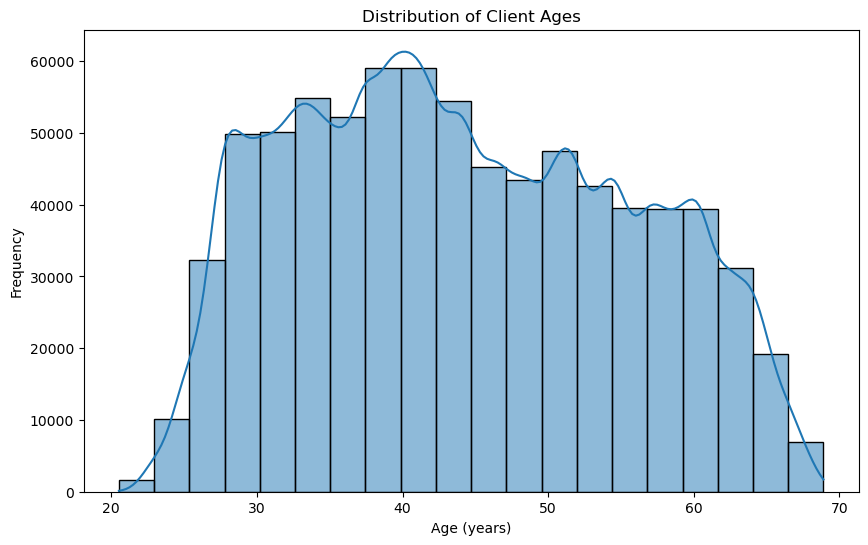

/home/yewi/anaconda3/envs/dev-ai/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


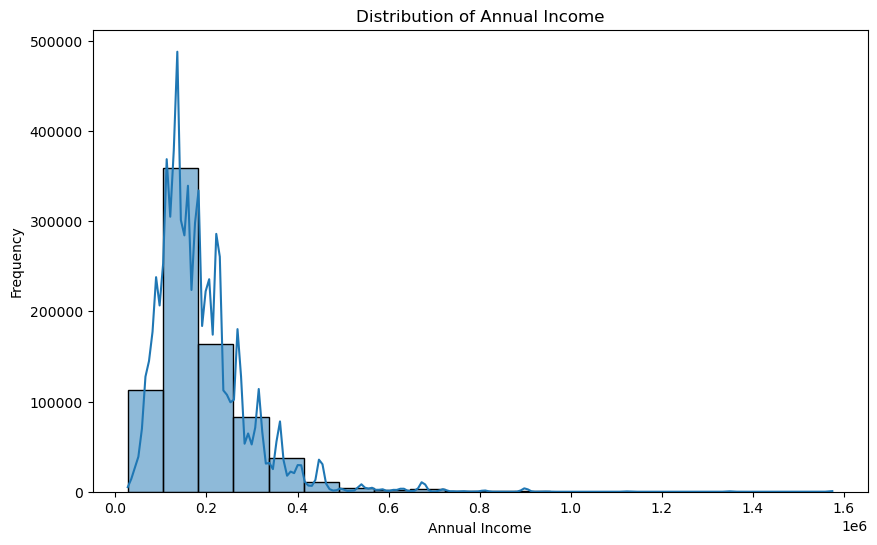

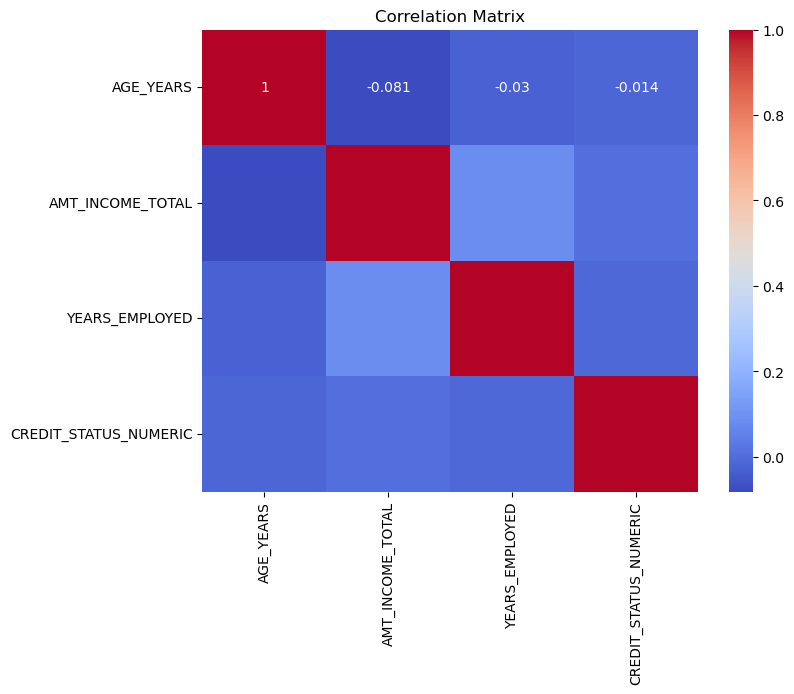

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've loaded the datasets into application_record_df and credit_record_df

# Merge the datasets on the 'ID' field
merged_df = pd.merge(application_record_df, credit_record_df, on='ID', how='inner')

# Data Cleaning
# Fill missing values for 'OCCUPATION_TYPE' with 'Unknown'
merged_df['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)

# Feature Engineering
# Convert DAYS_BIRTH to age in years and DAYS_EMPLOYED to years (handling positive values as unemployed)
merged_df['AGE_YEARS'] = merged_df['DAYS_BIRTH'] / -365
merged_df['YEARS_EMPLOYED'] = merged_df['DAYS_EMPLOYED'].apply(lambda x: x / -365 if x < 0 else 0)

# Simplify the STATUS column into binary 'Good' or 'Bad' credit behavior
merged_df['CREDIT_STATUS'] = merged_df['STATUS'].apply(lambda x: 'Good' if x in ['C', 'X', '0'] else 'Bad')

# Exploratory Data Analysis (EDA)
# Distribution of Ages
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['AGE_YEARS'], bins=20, kde=True)
plt.title('Distribution of Client Ages')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()

# Income Distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['AMT_INCOME_TOTAL'], bins=20, kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

# Correlation between Age, Income, Years Employed, and Credit Status
# Convert 'CREDIT_STATUS' to numeric for correlation analysis
merged_df['CREDIT_STATUS_NUMERIC'] = merged_df['CREDIT_STATUS'].map({'Good': 0, 'Bad': 1})

# Correlation matrix
corr_matrix = merged_df[['AGE_YEARS', 'AMT_INCOME_TOTAL', 'YEARS_EMPLOYED', 'CREDIT_STATUS_NUMERIC']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Further analyses can include more sophisticated statistical tests, more detailed EDA, and predictive modeling
